In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 生成数据集

In [0]:
def generate_data():
    X = np.random.RandomState(2019).randn(300,2)
    Y_ = [int(x0*x0+x1*x1 < 2) for (x0,x1) in X]
    Y_c = [['red' if y else 'blue'] for y in Y_] # 定义颜色
    X = np.vstack(X).reshape(-1,2)
    Y_ = np.vstack(Y_).reshape(-1,1)
    return X,Y_,Y_c

### 前向传播

In [0]:
def get_weight(shape, regularizer):
    w = tf.Variable(tf.random_normal(shape), tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

def get_bias(shape):
    return tf.Variable(tf.constant(0.01, shape=shape))

def forward(x,regularizer):
    w1 = get_weight([2,11],regularizer)
    b1 = get_bias([11])
    y1 = tf.nn.relu(tf.matmul(x,w1)+b1)
    
    w2 = get_weight([11,1],regularizer)
    b2 = get_bias([1])
    y = tf.matmul(y1,w2)+b2
    return y

### 反向传播

In [0]:
batch_size = 30
steps = 40000
LEARNING_RATE_BASE = 0.001
LEARNING_RATE_DECAY = 0.999
REGULARIZER = 0.01

def backward():
    x = tf.placeholder(tf.float32, shape=[None, 2])
    y_ = tf.placeholder(tf.float32, shape=[None, 1])
    
    X,Y_,Y_c = generate_data()
    
    y = forward(x,REGULARIZER)
    
    global_step = tf.Variable(0, trainable=False)
    
    learning_rate = tf.train.exponential_decay(LEARNING_RATE_BASE,
                                          global_step,
                                          300/batch_size,
                                          LEARNING_RATE_DECAY,
                                          staircase=True,
                                          name='learning_rate')

    loss_mse = tf.reduce_mean(tf.square(y-y_))
    loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))
    
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss_total)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(steps):
            start = (i*batch_size)%300
            end = start+batch_size
            sess.run(train_step, feed_dict={x:X[start:end], y_: Y_[start:end]})
            if i%2000==0:
                loss_v = sess.run(loss_total, feed_dict={x:X, y_:Y_})
                print('After %d step(s),loss is %f' %(i,loss_v))
                
        #xx在-3，3之间，步长0.01，yy也是
        xx,yy = np.mgrid[-3:3:.01, -3:3:.01]
        #将xx，yy拉直，合并成一个2列的矩阵，得到一个网格坐标点的集合
        grid = np.c_[xx.ravel(), yy.ravel()]
        #将网格坐标点喂入神经网络，probs为输出
        probs = sess.run(y,feed_dict={x:grid})
        #probs的shape调整成xx的样子
        probs = probs.reshape(xx.shape)

    plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
    plt.contour(xx,yy,probs,levels=[.5])
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

After 0 step(s),loss is 13.268441
After 2000 step(s),loss is 0.246348
After 4000 step(s),loss is 0.189237
After 6000 step(s),loss is 0.150584
After 8000 step(s),loss is 0.117534
After 10000 step(s),loss is 0.097350
After 12000 step(s),loss is 0.090612
After 14000 step(s),loss is 0.090060
After 16000 step(s),loss is 0.089887
After 18000 step(s),loss is 0.089773
After 20000 step(s),loss is 0.089694
After 22000 step(s),loss is 0.089474
After 24000 step(s),loss is 0.089260
After 26000 step(s),loss is 0.089111
After 28000 step(s),loss is 0.089013
After 30000 step(s),loss is 0.088944
After 32000 step(s),loss is 0.088889
After 34000 step(s),loss is 0.088844
After 36000 step(s),loss is 0.088

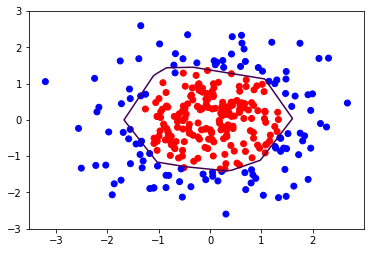

In [5]:
backward()